<a href="https://colab.research.google.com/github/stefkong1982/netology.ru/blob/Master/Statistika_v_Python/Itogovyj_blok_Python_dlya_analiza_dannyh/Kondratev_STPY_48_Itogovyj_blok.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Задание к итоговому проекту по курсу "Python для анализа данных"

Задание
Дан файл HR.csv с данными по опросу уровня удовлетворенности сотрудниками работой.
Файл доступен тут -
https://drive.google.com/file/d/1INgo03nal-vwFJe7Lec5vOUtOwfJdUr1/view?usp=sharing
Признаки:
1. `satisfaction_level` - Уровень удовлетворенности работой
2. `Last_evaluation` - Время с момента последней оценки в годах
3. `number_projects` - Количество проектов, выполненных за время работы
4. `average_monthly_hours` - Среднее количество часов на рабочем месте в месяц
5. `time_spend_company` - Стаж работы в компании в годах
6. `work_accident` - Происходили ли несчастные случаи на рабочем месте с сотрудником
7. `left` - уволился ли сотрудник
8. `promotion_last_5years` - повышался ли сотрудник за последние пять лет
9. `department` - отдел в котором работает сотрудник
10. `salary` - относительный уровень зарплаты


**Требуется выполнить следующее задание:**

**Задание - Баллы**

1. Загрузите файл HR.csv в pandas dataframe - 5

2. Рассчитайте основные статистики для переменных
(среднее,медиана,мода,мин/макс,сред.отклонение). - 10

3. Рассчитайте и визуализировать корреляционную матрицу для
количественных переменных.
Определите две самые скоррелированные и две наименее
скоррелированные переменные. - 10

4. Рассчитайте сколько сотрудников работает в каждом
департаменте. - 5

5. Показать распределение сотрудников по зарплатам. - 5

6. Показать распределение сотрудников по зарплатам в каждом
департаменте по отдельности - 5

7. Проверить гипотезу, что сотрудники с высоким окладом
проводят на работе больше времени, чем сотрудники с низким
окладом - 10

8. Рассчитать следующие показатели среди уволившихся и не
уволившихся сотрудников (по отдельности): - 10
* Доля сотрудников с повышением за последние 5 лет
* Средняя степень удовлетворенности
* Среднее количество проектов

9. Разделить данные на тестовую и обучающую выборки
Построить модель LDA, предсказывающую уволился ли
сотрудник на основе имеющихся факторов (кроме department и
salary)
Оценить качество модели на тестовой выборки - 20

10. Загрузить jupyter notebook с решение на github и прислать ссылку - 5

Итого - максимум 85 баллов

Для зачета необходимо набрать минимум 55

### Импорт библиотек

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import sklearn.metrics as metrics
# Импорт библиотек

### Загрузка файла HR.csv в pandas dataframe

In [8]:
data = pd.read_csv('https://raw.githubusercontent.com/stefkong1982/netology.ru/Master/Statistika_v_Python/Itogovyj_blok_Python_dlya_analiza_dannyh/HR.csv')
# Загружаем данные
data

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


In [17]:
# Проверка наличия пропущенных значений
missing_values = data.isnull().sum()
print(missing_values)

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
department               0
salary                   0
dtype: int64


### Рассчитаем основные статистики для переменных

#### Анализ категориальных столбцов

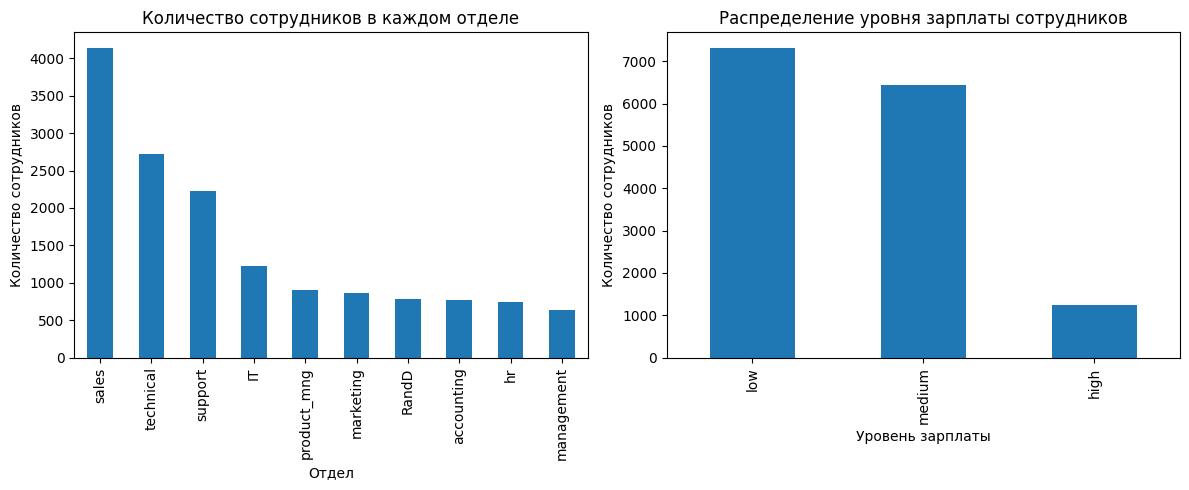

Распределение уровня зарплаты сотрудников:
low       7316
medium    6446
high      1237
Name: salary, dtype: int64

Количество сотрудников в каждом отделе:
sales          4140
technical      2720
support        2229
IT             1227
product_mng     902
marketing       858
RandD           787
accounting      767
hr              739
management      630
Name: department, dtype: int64


In [22]:
# Создание сетки для графиков
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

# Построение диаграммы для отделов
department_counts = data["department"].value_counts()
department_counts.plot(kind="bar", ax=axs[0])
axs[0].set_xlabel("Отдел")
axs[0].set_ylabel("Количество сотрудников")
axs[0].set_title("Количество сотрудников в каждом отделе")

# Построение гистограммы для уровня зарплаты
salary_counts = data["salary"].value_counts()
salary_counts.plot(kind="bar", ax=axs[1])
axs[1].set_xlabel("Уровень зарплаты")
axs[1].set_ylabel("Количество сотрудников")
axs[1].set_title("Распределение уровня зарплаты сотрудников")

# Размещение графиков на сетке
plt.tight_layout()
plt.show()

# Вывод распределения уровня зарплаты сотрудников
print("Распределение уровня зарплаты сотрудников:")
print(salary_counts)

# Вывод количества сотрудников в каждом отделе
print()
print("Количество сотрудников в каждом отделе:")
print(department_counts)